# Input Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Input Data

In [3]:
# 1. Baca data
data = pd.read_csv("heart.csv", sep=";")
print("Ukuran data:", data.shape)
print("5 data teratas:")
display(data.head())

Ukuran data: (918, 12)
5 data teratas:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Informasi Data

In [4]:
# 2. Cek tipe data dan missing value
print("\nInfo dataset:")
data.info()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Missing Value

In [5]:
print("\nCek missing value:")
print(data.isnull().sum())


Cek missing value:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## Melihat Distribusi pada data target

In [6]:
# 4. Cek distribusi target
print("\nDistribusi target (HeartDisease):")
print(data["HeartDisease"].value_counts())


Distribusi target (HeartDisease):
HeartDisease
1    508
0    410
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style agar lebih rapi
sns.set(style="whitegrid")

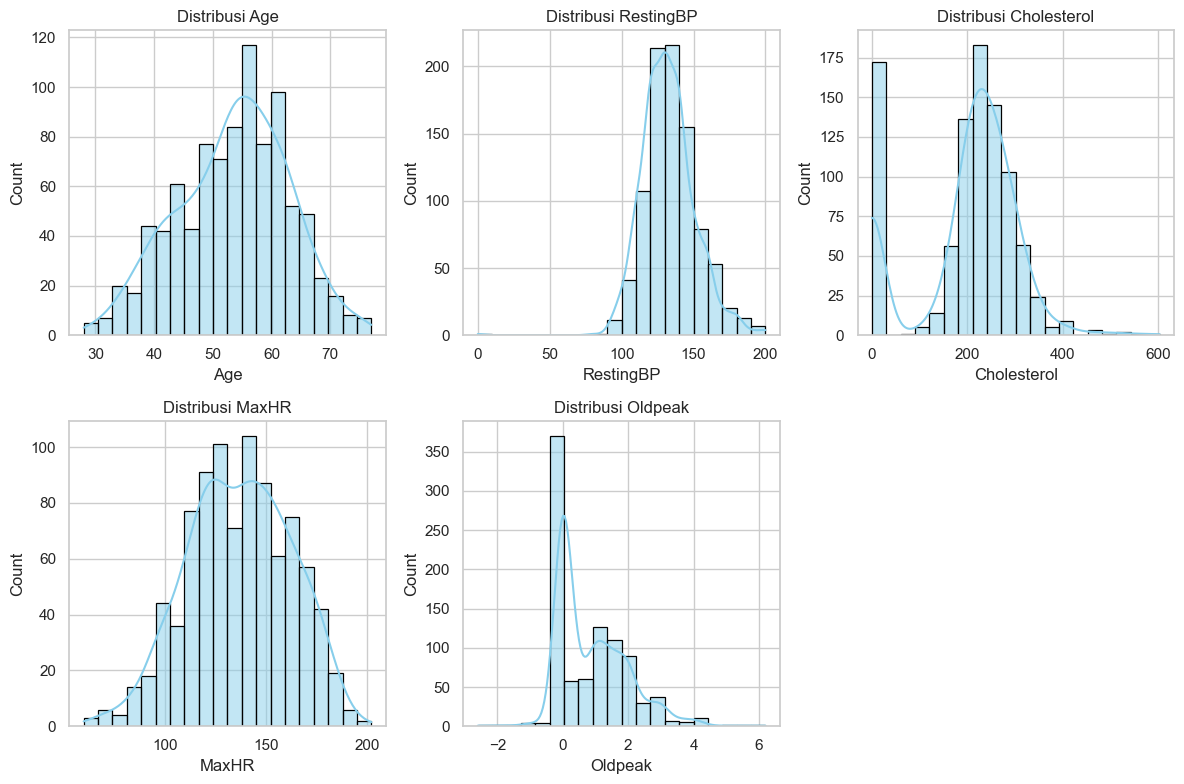

In [8]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


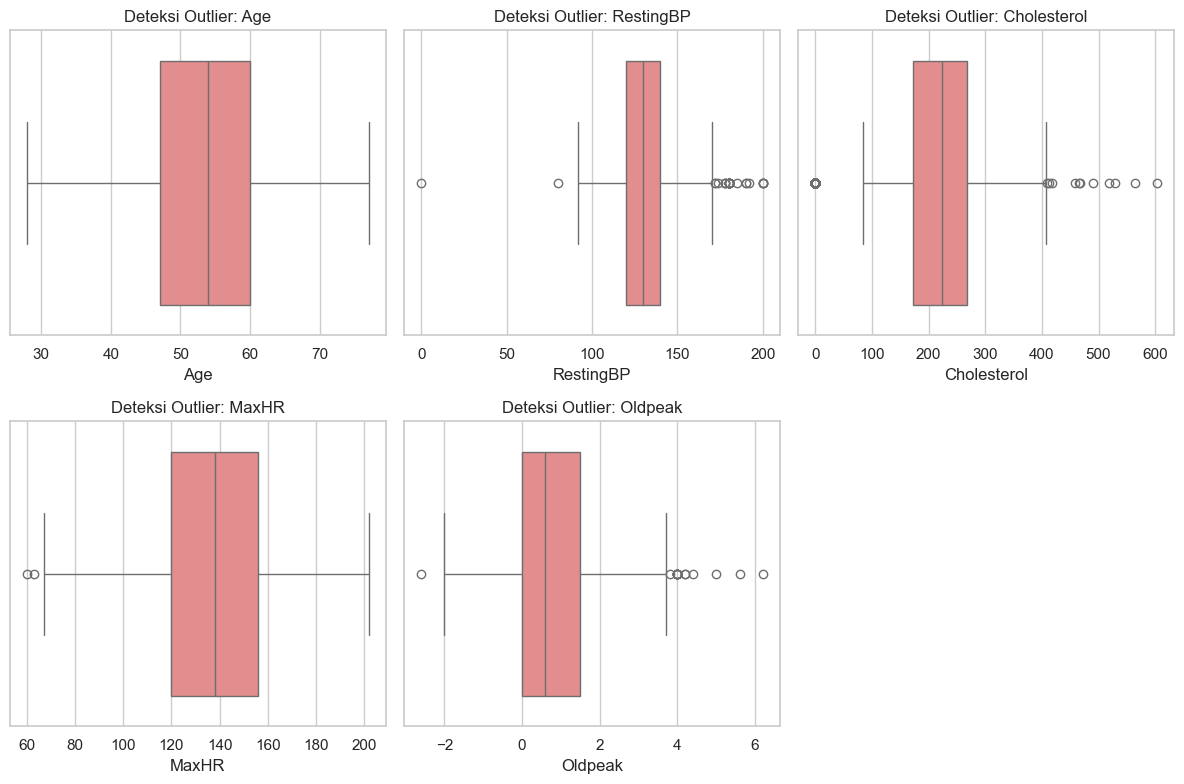

In [9]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Deteksi Outlier: {col}')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8748\590321385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=data, palette='Set2')


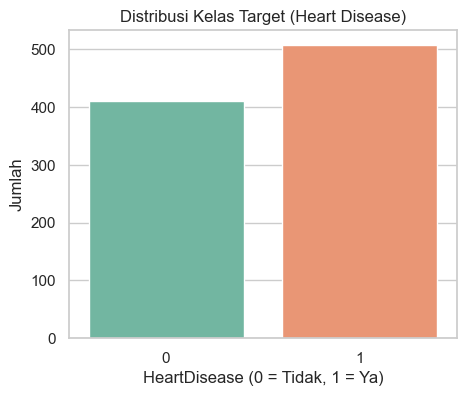

In [10]:
plt.figure(figsize=(5, 4))
sns.countplot(x='HeartDisease', data=data, palette='Set2')
plt.title("Distribusi Kelas Target (Heart Disease)")
plt.xlabel("HeartDisease (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()

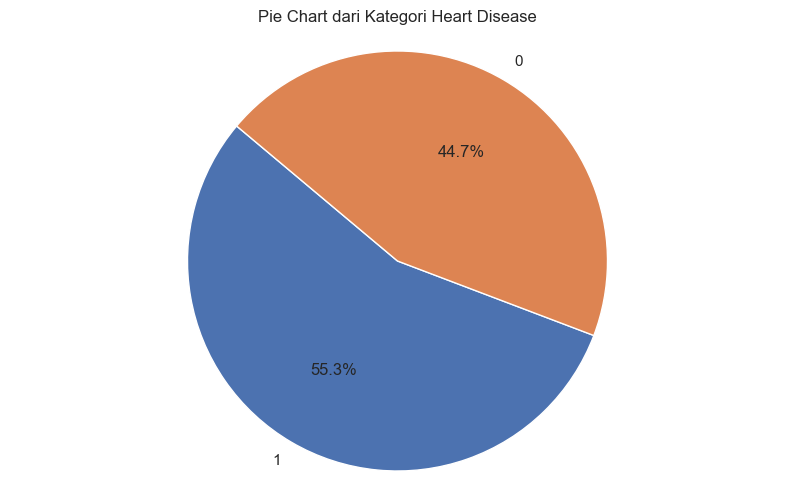

In [11]:
# Menghitung jumlah kemunculan setiap kategori pada kolom 'HeartDisease'
heartdisease = data['HeartDisease'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(heartdisease, labels=heartdisease.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart dari Kategori Heart Disease')
plt.axis('equal')  # Memastikan lingkaran memiliki aspek yang sama
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8748\284839707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data, palette='pastel')
C:\Users\USER\AppData\Local\Temp\ipykernel_8748\284839707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data, palette='pastel')
C:\Users\USER\AppData\Local\Temp\ipykernel_8748\284839707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=data, palette='pastel')
C:\Users\USER\AppData\Local\Temp\ipykernel_8748\2848397

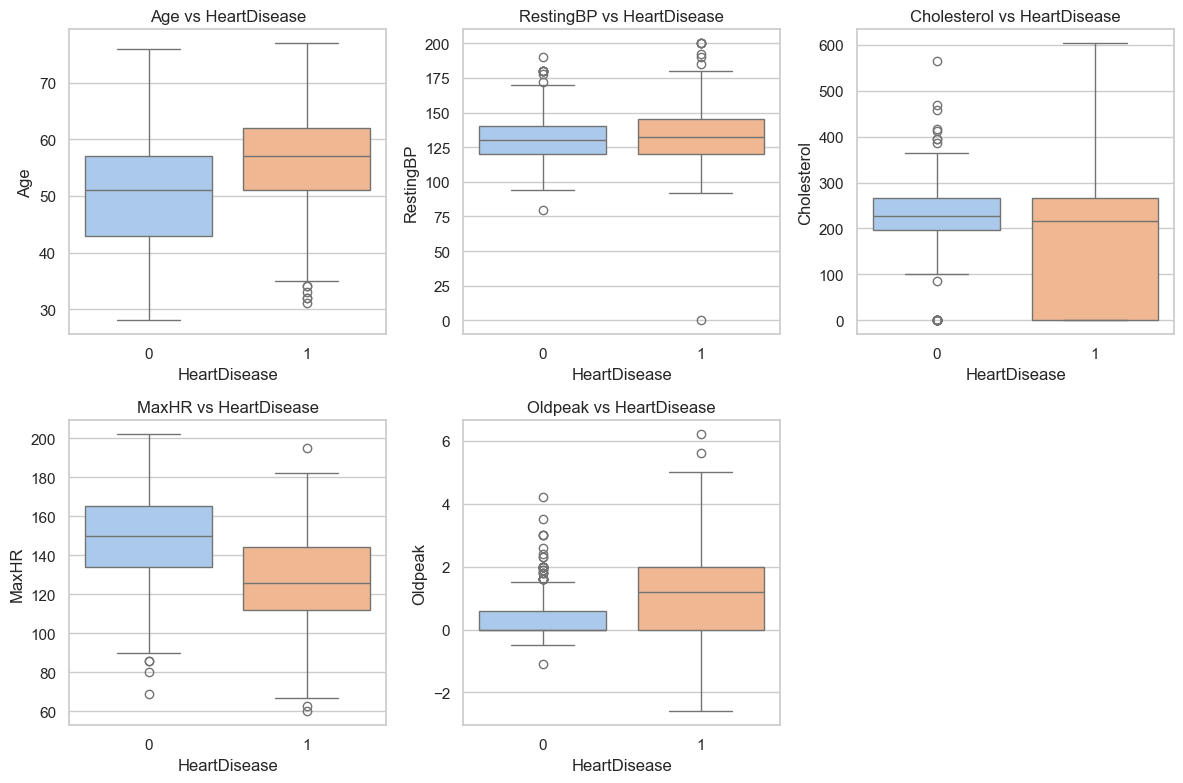

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=col, data=data, palette='pastel')
    plt.title(f'{col} vs HeartDisease')
plt.tight_layout()
plt.show()


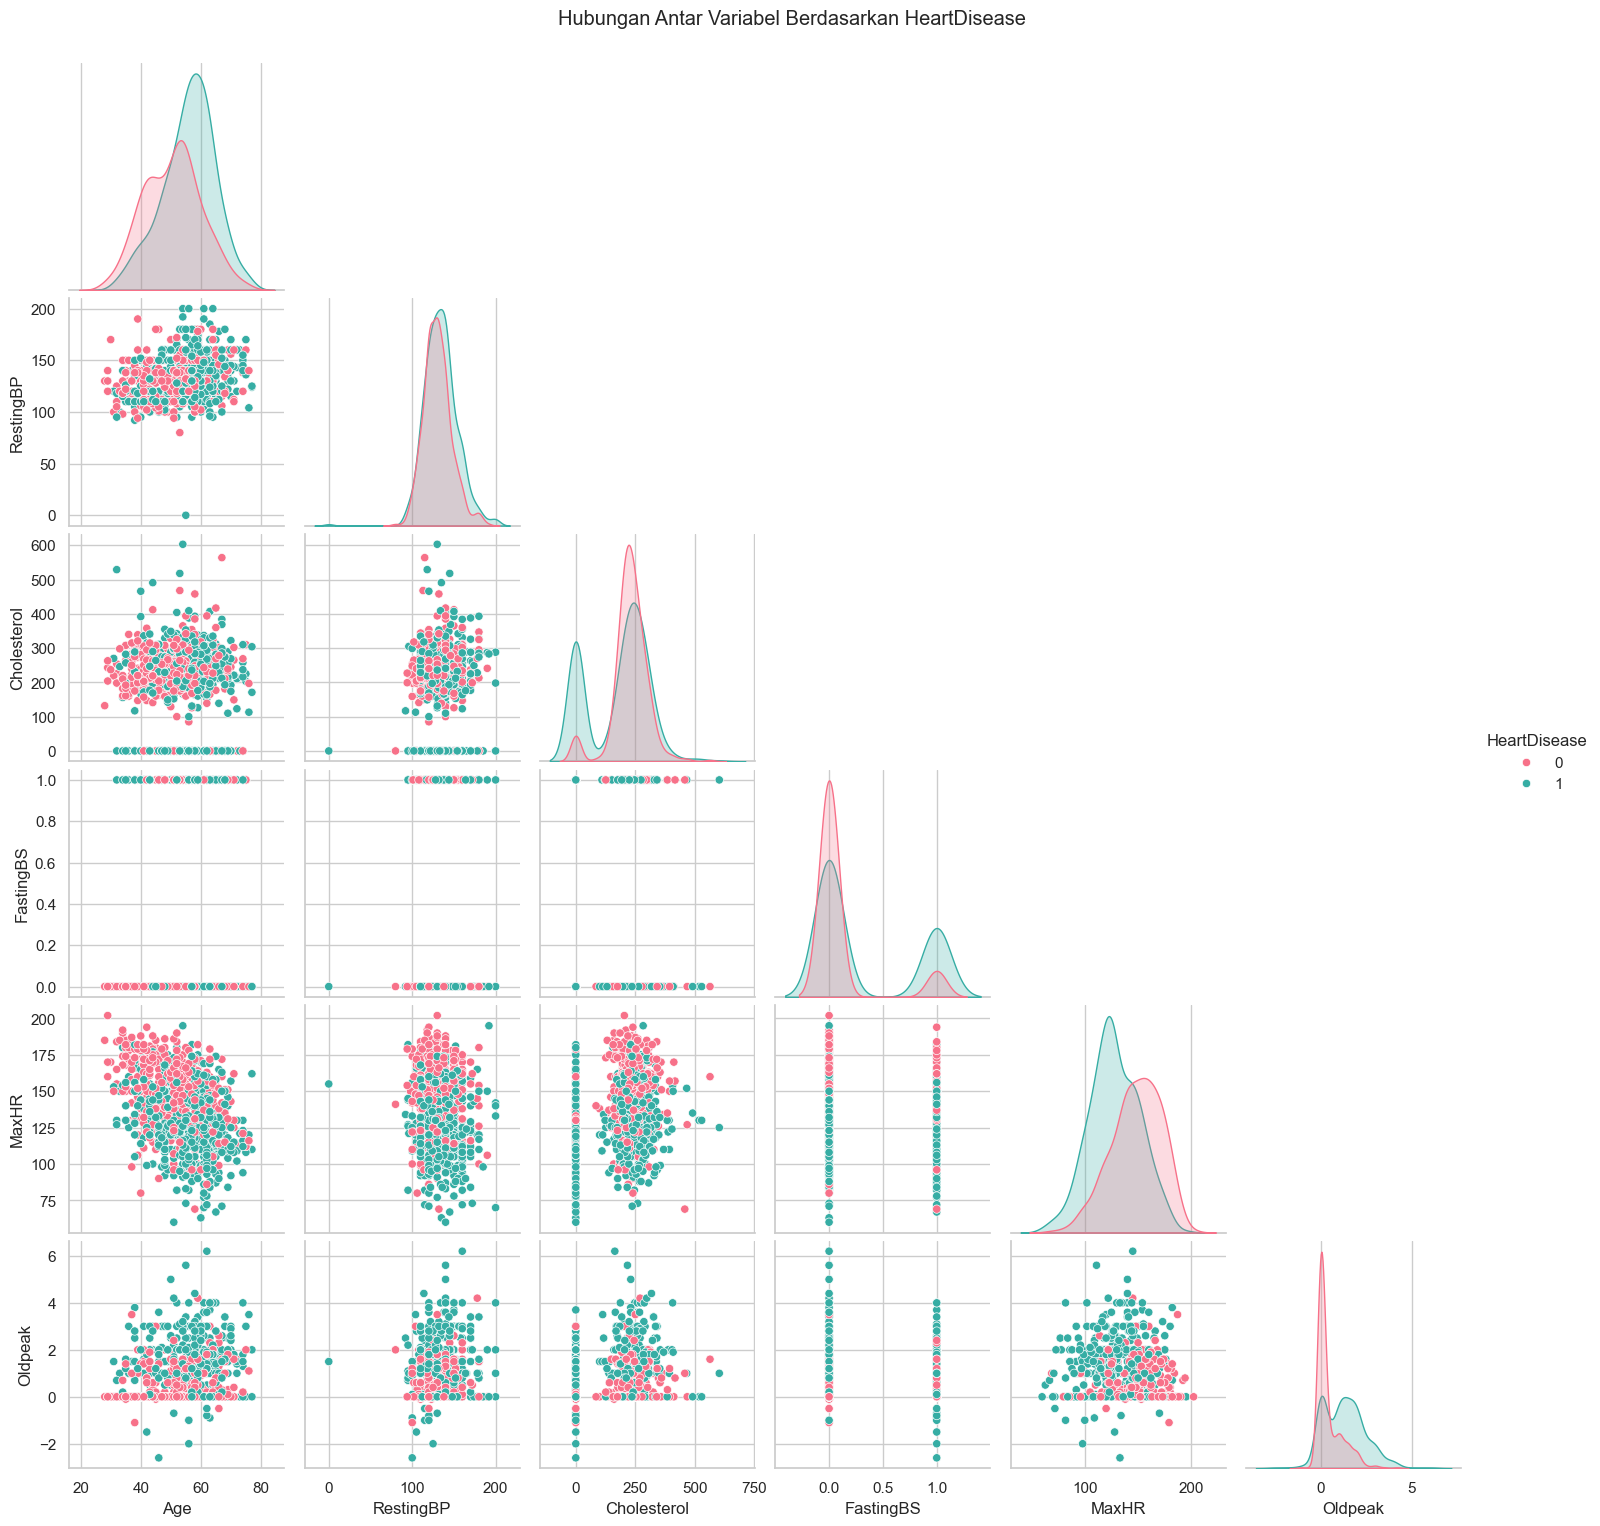

In [13]:
sns.pairplot(data, hue='HeartDisease', diag_kind='kde', corner=True, palette='husl')
plt.suptitle("Hubungan Antar Variabel Berdasarkan HeartDisease", y=1.02)
plt.show()

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [26]:
# Misalnya hasil dari encoding kamu tadi
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

encoder = OrdinalEncoder(categories=[
    ['F', 'M'],
    ['NAP', 'ATA', 'TA', 'ASY'],
    ['Normal', 'ST', 'LVH'],
    ['N', 'Y'],
    ['Up', 'Flat', 'Down']
])

data_encoded = data.copy()
data_encoded[categorical_cols] = encoder.fit_transform(data_encoded[categorical_cols])

# 🔹 Ubah tipe datanya menjadi kategori
for col in categorical_cols:
    data_encoded[col] = data_encoded[col].astype('int')

# Cek hasil
print(data_encoded.dtypes)


Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


In [27]:
print("lima data teratas setelah encoding:")
data_encoded.head()

lima data teratas setelah encoding:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,0,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,0,150,195,0,0,122,0,0.0,0,0


In [17]:
from sklearn.preprocessing import RobustScaler
# ========== 3. Scaling fitur numerik dengan RobustScaler ==========
scaler = RobustScaler()

# Tentukan fitur numerik yang akan diskalakan (selain target)
num_cols = ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Terapkan scaling
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# ========== 4. Cek hasil ==========
print(data_encoded.head())
print("\nRentang nilai setelah scaling:")
print(data_encoded[num_cols].describe().T[['min', 'max']])


   Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40  1.0           1.0        0.5     0.704000        0.0        0.0   
1   49  0.0           0.0        1.5    -0.458667        0.0        0.0   
2   37  1.0           1.0        0.0     0.640000        0.0        1.0   
3   48  0.0           3.0        0.4    -0.096000        0.0        0.0   
4   54  1.0           0.0        1.0    -0.298667        0.0        0.0   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0  0.944444            0.0 -0.400000      0.0             0  
1  0.500000            0.0  0.266667      1.0             1  
2 -1.111111            0.0 -0.400000      0.0             0  
3 -0.833333            1.0  0.600000      1.0             1  
4 -0.444444            0.0 -0.400000      0.0             0  

Rentang nilai setelah scaling:
                  min       max
RestingBP   -6.500000  3.500000
Cholesterol -2.378667  4.053333
FastingBS    0.000000  1.000000
MaxHR       -2.16

In [18]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns='HeartDisease')
y = data_encoded['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (734, 11)
Ukuran data uji: (184, 11)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8532608695652174
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        82
           1       0.89      0.83      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

[[72 10]
 [17 85]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.8760693318423259


In [22]:
# Gunakan parameter terbaik
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=0
)

# Latih model dengan seluruh data training
best_rf.fit(X_train, y_train)

# Prediksi data test
y_pred = best_rf.predict(X_test)


Accuracy (Test): 0.8804347826086957

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



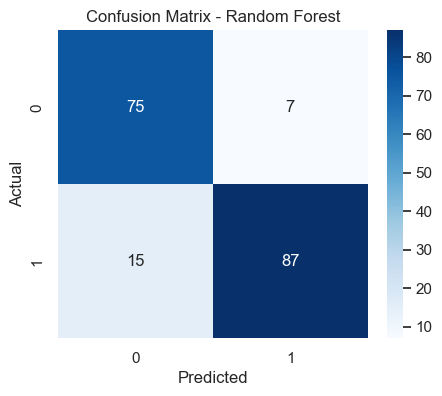

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluasi
print("Accuracy (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
import pickle
import os

# Buat folder model jika belum ada
os.makedirs("model", exist_ok=True)

# Simpan model dan scaler
with open("model/random_forest.pkl", "wb") as f:
    pickle.dump(best_rf, f)

with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [25]:
with open("requirements.txt", "w") as f:
    f.write("""streamlit==1.51.0
pandas==2.2.3
numpy==2.2.3
scikit-learn==1.6.1
matplotlib==3.10.0
pip==25.2
seaborn==0.13.2
joblib==1.4.2
""")
print("✅ File requirements.txt berhasil dibuat.")


✅ File requirements.txt berhasil dibuat.
